# Hightlight Top-N systems using pygraphviz

In [1]:
import pandas as pd
from src.utils.tree import SNPTreeParser

In [2]:
tree_parser = SNPTreeParser('./samples/ontology.txt', './samples/snp2gene.txt', sys_annot_file='GO_files/goID_2_name.tab') # You should put annotation file.

359 Systems are queried
183 Genes are queried
Total 2315 Gene-System interactions are queried
Building descendant dict
Subtree types:  ['default']


In [3]:
from src.utils.visualization import TreeVisualizer

In [4]:
sys_importance_df = pd.read_csv('./samples/output_model.sys_corr.csv') # this is from the prediction (check https://github.com/idekerlab/G2PT?tab=readme-ov-file#3-predict-with-trained-model)

In [5]:
sys_importance_df

,System,System_annot,Genes,Size,man_corr,woman_corr,corr_mean,corr_mean_abs
0,GO:0000003,reproduction,"CITED2,PDE3A,INSR,KIT,APOB,CAD,TIPARP,VEGFA,TU...",18,0.562326,0.426740,0.494533,0.494533
1,GO:0000122,negative regulation of transcription by RNA po...,"RBPJ,CITED2,EHMT2,TRPS1,NFE2L3,MLXIPL,VEGFA,LI...",13,-0.746650,-0.753836,-0.750243,0.750243
2,GO:0000165,MAPK cascade,"MAPK3,MADD,INSR,MAPKBP1,TAOK2,KIT,VEGFA,SLC30A...",13,0.277854,0.328203,0.303029,0.303029
3,GO:0000278,mitotic cell cycle,"CEP55,INSR,TAOK2,TK1,TUBG2,STAG1,UBXN2B,CENPT,...",13,0.158361,-0.006517,0.075922,0.082439
4,GO:0000280,nuclear division,"CEP55,PDE3A,EHMT2,RMI1,INSR,REEP3,PINX1,TUBG2,...",12,-0.371813,-0.488903,-0.430358,0.430358
...,...,...,...,...,...,...,...,...
354,GO:1902531,regulation of intracellular signal transduction,"MAPK3,MADD,NUP93,TAOK2,KIT,VEGFA,SLC30A10,NCK1...",28,0.308104,0.326853,0.317478,0.317478
355,GO:1902533,positive regulation of intracellular signal tr...,"SIK3,MAPK3,MADD,INSR,NUP93,MAPKBP1,TAOK2,KIT,V...",18,-0.417599,-0.545992,-0.481795,0.481795
356,GO:1903047,mitotic cell cycle process,"EXOC6,CEP55,REEP3,INSR,TAOK2,PINX1,TK1,TUBG2,S...",12,-0.485524,-0.474263,-0.479894,0.479894
357,GO:1903131,mononuclear cell differentiation,"HLA-DRA,CLPTM1,RBPJ,HLA-B,SPN,MFNG,KIT,VEGFA,G...",12,-0.481704,-0.438499,-0.460102,0.460102


You need to select the systems you want to hightlight.

For tutorial, let's select random 10 systems

In [6]:
random_10_systems = sys_importance_df.sample(n=10).System.values

In [7]:
random_10_systems

array(['GO:0046907', 'GO:0015850', 'GO:0050793', 'GO:0008285',
       'GO:0051641', 'GO:0003006', 'GO:0051726', 'GO:0098657',
       'GO:0023057', 'GO:0070925'], dtype=object)

In [8]:
tree_vis = TreeVisualizer(tree_parser)

collapse path done


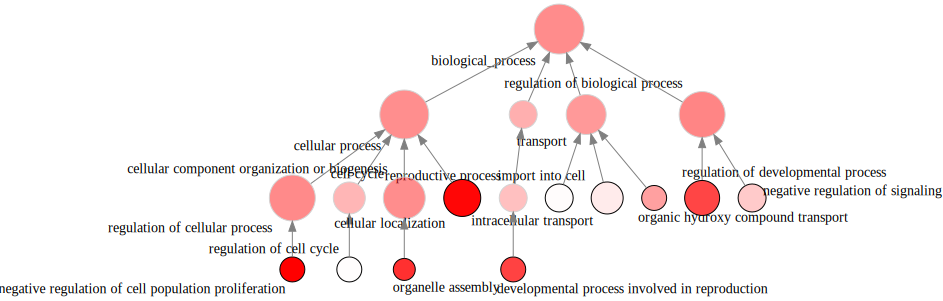

In [9]:
tree_vis.plot_highlighted_ontology(random_10_systems, sys_importance_df, vmin=0, vmax=0.8) #vmin and vmax : minimum and maximum value for color normalization (default: 0)